## Trying To Capturing Nonlinear Effects


**(Run this cell to define useful Latex macros)**
\\[
\newcommand{\bigoh}[1]{\mathcal{O}\left(#1\right)}
\newcommand{\card}[1]{\left\lvert#1\right\rvert}
\newcommand{\condbar}[0]{\,\big|\,}
\newcommand{\eprob}[1]{\widehat{\text{Pr}}\left[#1\right]}
\newcommand{\norm}[1]{\left\lvert\left\lvert#1\right\rvert\right\rvert}
\newcommand{\prob}[1]{\text{Pr}\left[#1\right]}
\newcommand{\pprob}[2]{\text{Pr}_{#1}\left[#2\right]}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\fpartial}[2]{\frac{\partial #1}{\partial #2}}
\\]


We've seen two kinds of *linear* classifier: (1) Naive Bayes and (2) Logistic Regression. Both kinds of classifier assign a weight to each feature, and classify an example by summing up the weights for the features that appear in the example.

We've seen that Naive Bayes calculates a specific choice of weights, whereas when we train Logistic Regression, it is free to choose the weights. In that sense, Naive Bayes is a special case of Logistic Regression.

Both kinds of model are linear. That means if feature $F_i$ is present, then you add in the weight $\theta_i$ regardless of what other features are present. You do not add in any different weight for $F_i$ based on whether or not some other feature is present. $F_i$ always has the same incremental contribution no matter the other features.

Note: the final probability calculated by a Logistic Regression model is not linear, because the probability is calculated by applying the nonlinear logistic function to the calculated log odds: it is the log odds which is linear in $x$. All the same, we call this a linear model because the effects of the $x_i$ are all linear.


These linear classifiers yield a *linear decision boundary*. The decision boundary is those values of $x$ where you believe $\prob{Y = 1 \condbar X = x} = \prob{Y = 0 \condbar X = x}$. On one side of the boundary you think it is more likely that $Y = 1$, and on the other that it is more likely that $Y = 0$.

In that case:

\\[
\begin{align}
&&
\prob{Y = 1 \condbar X = x}
&=
\prob{Y = 0 \condbar X = x}
\\
\Rightarrow&&
\frac{
    \prob{Y = 1 \condbar X = x}
}{
    \prob{Y = 0 \condbar X = x}
}
&=
1
\\
\Rightarrow&&
e^{
    \theta_0
    +
    \sum_i
    \theta_i x_i
}
&=
1
\\
\Rightarrow&&
    \theta_0
    +
    \sum_i
    \theta_i x_i
&=
    0
\end{align}
\\]

Since this last equation is linear in the $x_i$, it shows that the decision boundary is a line.

### Example Of Nonlinear Effect

Let me give you an example of something that can *not* be modeled with just linear effects. I will give you a silly example, then I will give you a good one :-)

I want to make sure my roommate feeds my cats while I am away on vacation. The variable I want to predict is $Y$, where $Y = 1$ means my cats get fed, and $Y = 0$ means my cats don't get fed.

I ask my roommate whether they will agree to feed the cats while I'm gone. Their reply is encoded as a variable $X_1$, where $X_1 = 1$ means they say yes they will feed the cats, and $X_1 = 0$ means they say no they will not.

Because my roommate is not always entirely truthful, I will ask them "Was your answer to my question about feeding the cats a lie?" Luckily, even though my roommate is not always entirely truthful, they would never lie to me about lying. Their response is encoded as $X_2 = 1$ if they admit they were originally lying, and $X_2 = 0$ if not.

What is happening here? The presence of the second feature is *reversing* the power of the first. If $X_1 = 1$ indicates my roommate will probably feed my cats when $X_2 = 0$, then it means the exact opposite when $X_2 = 1$.

In fact, if I only know the value of $X_1$, that tells me *nothing* about whether my cats will get fed (assuming my roommate lies 50% of the time). So the "individual" weight of $X_1$ should be no evidence. Likewise $X_2$ alone conveys no information.


How do I define the desired output $Y$ value in terms of $X_1$ and $X_2$? The kind of function we are trying to define is called *exclusive or*, abbreviated *xor*. An xor works like this:

\\[
0 ⊕ 0 := 0
\\
1 ⊕ 0 := 1
\\
0 ⊕ 1 := 1
\\
1 ⊕ 1 := 0
\\]

So the model I am trying to learn is like this $Y = X_1 \oplus X_2$.

## No Linear Function Captures This Relationship

In isolation, $X_1$ (and $X_2$) are meaningless. You cannot decompose the overall phenomenon into a combination of phenomena involving just $X_1$ and $X_2$.

For instance, consider any linear function:

\\[
w_1 x_1 + w_2 x_2
\\]

Is there a setting of the $w_1, w_2$ values such that this equation is positive when $(x_1, x_2) = (0, 1)$ or $(1, 0)$, but negative when $(x_1, x_2) = (0, 0)$ or $(1, 1)$? The answer is there is not.


(-1, 2)

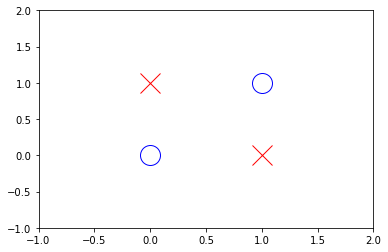

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(
    [0, 1],
    [1, 0],
    'x',
    color = 'red',
    markersize = 20,
)

plt.plot(
    [0, 1],
    [0, 1],
    'o',
    color = 'blue',
    markerfacecolor = 'none',
    markersize = 20,
)

plt.ylim(ymin = -1, ymax = +2)
plt.xlim(xmin = -1, xmax = +2)


In the graph above, you see a two red 'x's where the XOR function should be one, and two blue 'o's where the XOR function should be zero.

You see that no line can have the 'x's on one side and 'o's on the other.

Consider any linear function $z = w_0 + w_1 x + w_2 y $. This is the equation for a plane. Imagine the $z$ axis is coming straight out of the screen at you. Then where the plane crosses the $x, y$ plane (where $z = 0$), this crossing is a line.

I can show you algebra style:

\\[
\begin{align}
&z = w_0 + w_1 x+ w_2 y \quad\text{and}\quad z = 0
\\
\Rightarrow\quad&
0 = w_0 + w_1 x + w_2 y
\\
\Rightarrow\quad&
-w_2 y = w_0 + w_1 x
\\
\Rightarrow\quad&
y = -\frac{w_0}{w_2} + -\frac{w_1}{w_2} x
\end{align}
\\]


Now, on one side of this line of intersection in the $x, y$ plane is where the $z$ values are positive, and on the other side are where the $z$ values are negative.

Together, this shows that no linear function of $x$ and $y$ can properly seperate the red 'x's and the blue 'o's on different sides of the dividing line.

This shows that no linear model can properly learn to distinguish points where the XOR function takes a positive value from points where the XOR function takes a zero value. In jargon, we say that the red 'x's and blue 'o's are not *linearly separable*

## Nonlinear Decision Boundary

There is a simple nonlinear function that will seperate the XOR examples properly. It is:

\\[
z = x + y - 2xy - 0.1
\\]

You may want to check out the *decision boundary*:

\\[
\begin{align}
&z = x + y - 2xy - 0.33 \quad\text{and}\quad z = 0
\\
\Rightarrow\quad&
2xy - y = x - 0.33
\\
\Rightarrow\quad&
(2x - 1)y = x - 0.33
\\
\Rightarrow\quad&
y = \frac{x - 0.33}{2x - 1}
\end{align}
\\]

This is not a linear function, because it has $x$ values on top and bottom of an irreducible fraction. We can graph this:

(-1, 2)

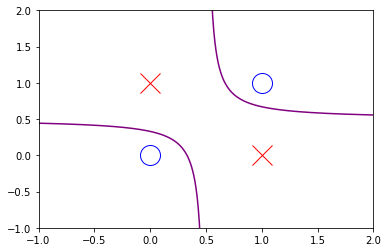

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    [0, 1],
    [1, 0],
    'x',
    color = 'red',
    markersize = 20,
)

plt.plot(
    [0, 1],
    [0, 1],
    'o',
    color = 'blue',
    markerfacecolor = 'none',
    markersize = 20,
)


# Because the hyperbola graph is discontinuous, I graph it
# in two parts.
x = np.arange(-1, 1 / 2.0 - 0.01, 0.01)
plt.plot(
    x,
    (x - 0.33) / (2.0 * x - 1),
    color = 'purple'
)

x = np.arange(1 / 2.00 + 0.01, 2, 0.01)
plt.plot(
    x,
    (x - 0.33) / (2.0 * x - 1),
    color = 'purple'
)

plt.ylim(ymin = -1, ymax = +2)
plt.xlim(xmin = -1, xmax = +2)


This shows a *nonlinear* decision that separates the red 'x's and blue 'o's. But a nonlinear decision boundary has to come from a nonlinear function. That's why we needed the $xy$ *cross term.* This cross term is only positive when $x$ and $y$ are *both* positive, or *both* negative.

### Adding Cross Terms

One way to improve our linear regression and logistic regression techniques is to add in these cross terms. The easiest way to do ths is add new "synthetic" features. If I want to predict a target variable $Y$ from predictor variables $X_1, X_2, X_3, \ldots X_N$, I can add a new feature called $X_{i, j} := X_i \cdot X_j$ for every (unordered) pair of $i$ and $j$.

Having added in these synthetic variables, I can then just do normal linear or logistic regression. The fundamental *statistical problem* is still linear. As far as the learner is concerned, it is still learning a linear function, it just now has a bunch of new variables, which the learner doesn't know are resulting in a nonlinear decision boundary.

Some people call this extended form of linear regression: *polynomial regression*. My point is that even when using higher-order polynomials with square powers or cross terms or more, the underlying learning technique is still learning a linear model.

In other words: the model is only nonlinear because you fed it features that you transformed nonlinearly. That was based on *your* choice or prior knowledge, not the model's choice or anything it "learned."

### The Computation Required By Adding Higher Order Terms Isn't Scalable

Because some variables might have interactions effects you want to capture, you can add in cross terms. But if you have $N$ dimensions of input dimensions, then that implies you will add in $\frac{n(n - 1)}{2}$ cross terms.

If you want to capture interactions of three variables, you'd have to add in $\frac{n(n - 1)(n-2)}{6}$.

In general, if you want $k$-way interactions, you need to add $\bigoh{n^k}$ terms. This grows exponentially in $k$.

What is the problem with more features? First of all, the more features you have, the more data you have, which means calculations are slower. If you are using gradient descent, each update requires work that is linear in the number of features. But if you start adding 2-way interactions, each update is now taking $\bigoh{n^2}$ time. It has to take that long because every update step needs to update the $\bigoh{n^2}$ *parameters*: one for each feature. In terms of both speed and memory usage (because you need to store all the parameters in memory), this will hit a brick wall very fast.


### Higher Order Terms Often Lead To Overfitting

The other part that doesn't scale is that the more parameters you have, the more datapoints you will need to stop the model from *overfitting*.

Let's remember what overfitting is. Overfitting is the model learning patterns that aren't really "there." It is basically the model thinking that coincidences are a general rule. This "knowledge" will have no predictive value in the future.

When do we avoid overfitting? When we have a lot of data and a simple model. For any "fake" knowledge, if I get more and more data, that fake knowledge will be eventually be exposed as wrong. That means it is harder to learn a spurious relationship with more data.


A simple model is important as well. The more complex my model, the more baroque a sham theory I can spin. The more complexity I have to work with, the more I can try to explain away data that would otherwise contradict a simpler version of my fake theory.

Let me give a silly example. Say I propose that the Earth is flat. You ask: "Why do the tops of ships appear at the horizon first?" I say "well, that is explained by a complicated theory of perspective." You ask: but why, at the summer solstice, was the sun directly overhead in Syene, but still cast a shadow in Alexandria? I say something about a complicated theory of refraction. You ask: why is it that if I travel east continuously, that I end up where I started? I say something about how you don't notice you're turning.

My point is this: to sustain a false belief in the face of more and more evidence to the contrary, I need to add new twists to explain away that evidence. Adding more parameters to a model makes the model better able to capture complex relationships, but also more able to come up with complicated wrong theories that are hard to disprove.

When we start considering adding $\bigoh{n^k}$ features, we're talking about *a lot* of new features. All these new features will greatly increase the model complexity. So I better have *a lot* of data if I'm going to avoid overfitting.


### Useless Capacity

Ultimately, if you really do have interaction effects, then you should have terms in your model to account for that. So adding some cross terms in may be the right thing to do.

However: should you be adding *all* the cross terms? Some pairs of features will have strong interaction effects, but other pairs of features will have no interaction effect at all.

Adding an interaction feature for a feature pair which don't interact at all is bad. This won't help your model do better. The additional capacity cannot be used to improve your predictions. The only thing this capacity can be used for is overfitting. It is burdensome: all else equal, you're going to need to have more data to prove that you shouldn't use this interaction feature.

Even if there are weak pairwise interactions between some features, the ability to learn these weak interactions may be swamped by the perceived utility in using the feature for overfitting. In that case, it would be better to leave this term out.

Therefore we come to two rules:

1. If we have more data, we can add more interaction terms. If we have less data, we should add fewer interaction terms.
2. We want to add an interaction term when there is a strong interaction effect. In that case, the term can improve future accuracy significantly. If the interaction effect is very small, then there is less benefit to adding the term. There is cost to adding any new interaction term: the ability to use the term for overfitting.


### Prior Domain Specific Knowledge vs Learned Knowledge

If you are careful to avoid adding interaction terms that only add useless capacity: more power to you. That is a good thing and you should do it. This kind of knowledge you are injecting is called *prior domain specific knowledge*. Domain specific knowledge is what you know about the specific problem you are trying to solve. *Prior* knowledge is knowledge you already have about your problem, before you start trying to have an algorithm learn new things.

You should exploit the prior knowledge you have; there is no point fighting with a hand tied behind your back. But domain specific knowledge is not general, so it can't always help you.

We would like the model to be able to learn domain specific knowledge for itself. Instead of *you* injecting knowledge by choosing interaction pairs to include, we want the *model* to learn that, without going nuts and seeing spurious relationships that don't really exist.

That's what motivates us to consider new kinds of models that can capture nonlinear relationships. Enter the neural network!
